In [8]:
# On Google Colab, sklearn is installed by default

import sklearn
from sklearn import metrics
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [2]:
# Copy this from excel. (You may need to first copy it to a text editor like
# VSCode first.)

data = """F	-4.0
T	-4.3
F	-2.7
F	-6.5
F	-7.7
F	-1.9
F	-0.2
F	-2.3
F	-0.9
T	-13.2
F	-10.6
F	-13.0
F	-8.0
F	-12.2
T	-12.3
F	-4.7
F	-11.6
F	-2.0
F	-2.6
F	-9.2
F	-12.0
F	-3.5
F	-5.3
F	-1.5
F	-2.2
T	-10.0
F	-1.3
F	-5.7
F	-2.3
T	-14.3
F	-4.9
F	-3.6
F	-10.8
T	-14.7
F	-2.4
T	-13.6
F	-12.1
F	-10.1
F	-9.4
F	-4.0
F	-0.1
T	-0.3
F	-10.7
F	-0.2
F	-9.5
F	-1.6
F	-7.6
F	-6.6
F	-3.2
F	-5.7
F	-3.8
F	-0.9
F	-2.3
F	-10.6
T	-2.2
F	-0.3
F	-0.7
F	-8.6
F	-12.9
F	-7.2
F	-7.1
T	-12.4
F	-1.3
F	-5.8
F	-4.1
F	-2.8
F	-11.2
T	-11.6
F	-2.5
F	-6.0
F	-5.5
F	-11.2
F	-2.0
F	-14.9
F	-14.1
F	-6.8
F	-9.1
F	-9.2
F	-8.8
F	-3.6
T	-12.0
F	-11.6
T	-8.4
F	-2.0
F	-10.2
F	-7.3
F	-1.2
T	-14.2
F	-8.6
F	-6.0
F	-5.9
T	-14.6
F	-13.6
T	-12.2
F	-4.3
F	-1.9
F	-4.5
F	-4.5
F	-7.8
F	-1.6
T	-13.5
T	-14.1
F	-6.1
F	-9.3
F	-1.7
F	-0.5
F	-8.1
F	-7.9
F	-7.8
F	-10.1"""

In [3]:
# Divide the data into columns
y_true = [l.split()[0] for l in data.split("\n")]

# sklearn expects better scores to be more positive, but biotite/AutoDock Vina
# give more negative scores to better ligands. So we use -float(...)
y_score = [-float(l.split()[1]) for l in data.split("\n")]

y_true[:10], y_score[:10]

(['F', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'T'],
 [4.0, 4.3, 2.7, 6.5, 7.7, 1.9, 0.2, 2.3, 0.9, 13.2])

In [4]:
# sklearn expects the labels (y_true) to be 0 if false or 1 if true.
y_true_fixed = [0 if y == "F" else 1 for y in y_true]
y_true_fixed[:10]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]

In [9]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true_fixed, y_score)
fpr, tpr, thresholds

(array([0.        , 0.01086957, 0.01086957, 0.0326087 , 0.0326087 ,
        0.05434783, 0.05434783, 0.06521739, 0.07608696, 0.08695652,
        0.10869565, 0.13043478, 0.15217391, 0.17391304, 0.18478261,
        0.20652174, 0.20652174, 0.23913043, 0.26086957, 0.2826087 ,
        0.30434783, 0.30434783, 0.33695652, 0.35869565, 0.45652174,
        0.47826087, 0.5       , 0.52173913, 0.56521739, 0.58695652,
        0.59782609, 0.60869565, 0.63043478, 0.64130435, 0.66304348,
        0.73913043, 0.77173913, 0.7826087 , 0.81521739, 0.83695652,
        0.84782609, 0.86956522, 0.88043478, 0.90217391, 0.91304348,
        0.93478261, 0.95652174, 0.9673913 , 0.98913043, 1.        ]),
 array([0.        , 0.        , 0.22222222, 0.33333333, 0.44444444,
        0.44444444, 0.55555556, 0.61111111, 0.61111111, 0.66666667,
        0.72222222, 0.72222222, 0.72222222, 0.72222222, 0.72222222,
        0.72222222, 0.77777778, 0.77777778, 0.77777778, 0.77777778,
        0.77777778, 0.83333333, 0.83333333, 0.

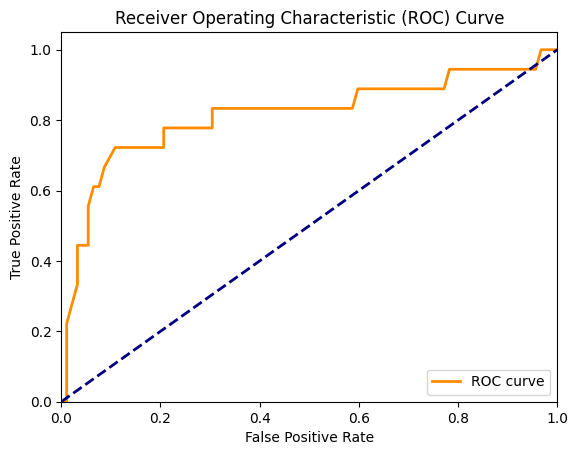

In [10]:
# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [11]:
# Calculate the AUC
roc_auc = auc(fpr, tpr)

print('AUC:', roc_auc)

AUC: 0.8143115942028986
